<a href="https://colab.research.google.com/github/arshiya07/SupervisedLearning/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as nd

#assigning the input data frame to df
df = pd.read_csv('heart.csv')

#displaying the top 5 content of df
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#checking for number of null values each feature has
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#checking the data type of each column
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
#getting the statistical values related to each data value
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#grouping the data set according to presence/absence of heart diseases
dft = df.groupby('target').size()

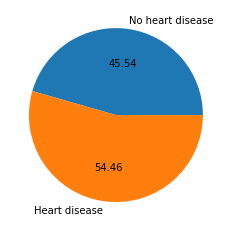

In [ ]:
import matplotlib.pyplot as plt
plt.pie(dft.values, labels = ["No heart disease", "Heart disease"],autopct='%.2f') 
plt.show()

As we can see, the percentage of people having heart disease is more than those without any ailment in the given data set.

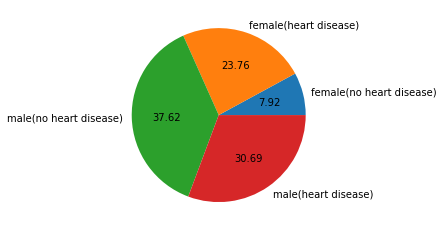

In [ ]:
dfv= df.groupby(['sex','target']).size()
plt.pie(dfv.values,labels = ['female(no heart disease)','female(heart disease)','male(no heart disease)','male(heart disease)'],autopct='%.2f')
plt.show()

From the above representation, we can assess that men have higher risk of being afflicted with a heart disease than females.

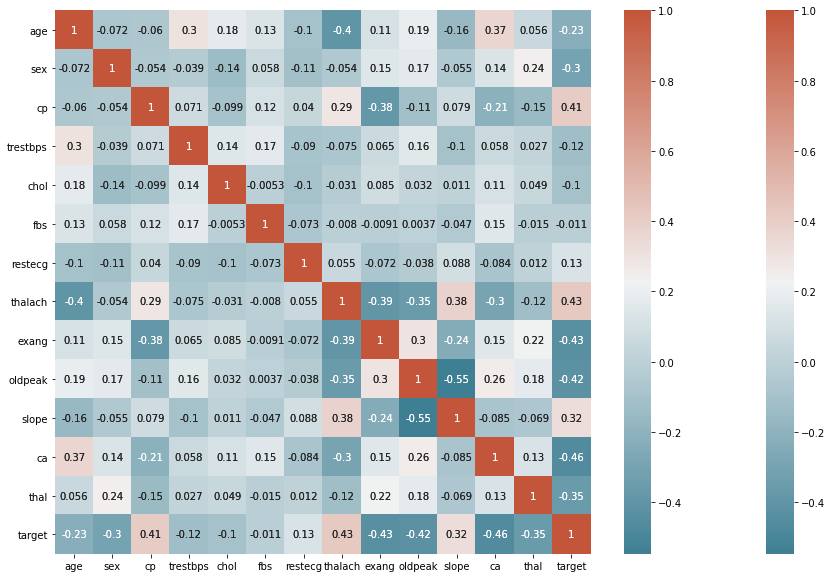

In [ ]:
#correlation matrix
corr = df.corr()
plt.subplots(figsize=(15,10))
import seaborn as sns
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


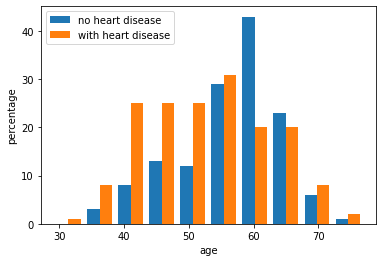

In [ ]:
#relation of age with presence of heart disease
plt.hist([df[df.target==0].age, df[df.target==1].age],label = ["no heart disease","with heart disease"])
plt.xlabel("age")
plt.ylabel("percentage")
plt.legend()
plt.show()

Age group 0f 40-50 has more chances of getting heart related diseases.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


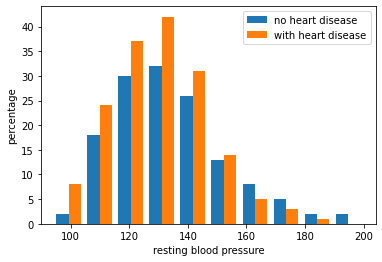

In [ ]:
#Relation of blood pressure with heart disease
plt.hist([df[df.target==0].trestbps, df[df.target==1].trestbps],label = ["no heart disease","with heart disease"])
plt.xlabel("resting blood pressure")
plt.ylabel("percentage")
plt.legend()
plt.show()

People with resting blood pressure level of 120-140 have higher risk of getting heart related diseases.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


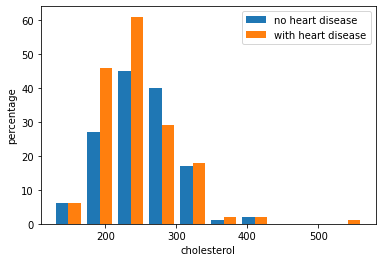

In [ ]:
#Relation of cholesterol with heart diseases.
plt.hist([df[df.target==0].chol, df[df.target==1].chol],label = ["no heart disease","with heart disease"])
plt.xlabel("cholesterol")
plt.ylabel("percentage")
plt.legend()
plt.show()

People with cholesterol level in the range of 200 -300 have higher risk of contracting heart diseases.

In [ ]:
from scipy import stats
import numpy as np
threshold =3
z = np.abs(stats.zscore(df))


In [ ]:
df.shape

(303, 14)

In [ ]:
#Remoing all outliers uding Z score of 3
df = df[(z < 3).all(axis=1)]
df.shape

(287, 14)

In [ ]:
x = df.drop('target',axis=1)
y = df['target']
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size=0.25, random_state=9)

In [ ]:
from sklearn import svm
smodel = svm.SVC(C=2,kernel='linear',gamma= 0.5)


In [ ]:
smodel.fit(xtrain,ytrain)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(ytest,smodel.predict(xtest)))
print("Precision:",metrics.precision_score(ytest,smodel.predict(xtest)))
print("Recall:",metrics.recall_score(ytest,smodel.predict(xtest)))

Accuracy: 0.8611111111111112
Precision: 0.813953488372093
Recall: 0.9459459459459459


In [ ]:
from sklearn.linear_model import LogisticRegression
lmodel = LogisticRegression()

In [ ]:
lmodel.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(ytrain,lmodel.predict(xtrain)))
print(mean_absolute_error(ytest,lmodel.predict(xtest)))

0.13023255813953488
0.1111111111111111


In [ ]:
print(lmodel.score(xtrain,ytrain))
print(lmodel.score(xtest,ytest))

0.8697674418604651
0.8888888888888888


In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
confusion_matrix(ytrain,lmodel.predict(xtrain))

array([[ 74,  20],
       [  8, 113]])

In [ ]:
confusion_matrix(ytest,lmodel.predict(xtest))

array([[28,  7],
       [ 1, 36]])

In [ ]:
confusion_matrix(ytrain,smodel.predict(xtrain))


array([[ 75,  19],
       [  8, 113]])

In [ ]:
confusion_matrix(ytest,smodel.predict(xtest))

array([[27,  8],
       [ 2, 35]])

In [ ]:
tp_test,fn_test,fp_test,tn_test = confusion_matrix(ytest,lmodel.predict(xtest), labels=[1,0]).ravel()
tp_test,tn_test,fp_test,fn_test

(36, 28, 7, 1)

In [ ]:
precision_rate = tp_test / (tp_test + fp_test)
recall_rate = tp_test / (tp_test + fn_test)

In [ ]:
print("The precision rate is: ", precision_rate)
print("The recall rate is: ", recall_rate)

The precision rate is:  0.8372093023255814
The recall rate is:  0.972972972972973


In [ ]:
xtrain.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [ ]:
input = np.zeros(len(xtrain.columns))

In [ ]:
age = 55
sex = 1
cp = 0
trestbps = 140
chol = 250
fbs = 0
restecg = 0
thalach = 150
exang = 1
oldpeak = 1
slope = 1
ca = 0
thal = 2

input[0] = age
input[1] = sex
input[2] = cp
input[3] = trestbps
input[4] = chol
input[5] = fbs
input[6] = restecg
input[7] = thalach
input[8] = exang
input[9] = oldpeak
input[10] = slope
input[11] = ca
input[12] = thal


In [ ]:
print(lmodel.predict([input])[0])


0
